In [1]:
# Import necessary libraries
# !pip install tensorflow tensorflow-serving-api numpy opencv-python matplotlib

import base64
import grpc
import tensorflow as tf

from tensorflow_serving.apis import predict_pb2
from tensorflow_serving.apis import prediction_service_pb2_grpc

import numpy as np
import cv2
import matplotlib.pyplot as plt

2023-09-29 11:11:34.627462: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
endpoint = "localhost:8500"

In [3]:
GRPC_MAX_RECEIVE_MESSAGE_LENGTH = 4096 * 4096 * 3
channel = grpc.insecure_channel(endpoint, options=[("grpc.max_receive_message_length", GRPC_MAX_RECEIVE_MESSAGE_LENGTH)])

In [4]:
stub = prediction_service_pb2_grpc.PredictionServiceStub(channel)

In [5]:
image_path = "images/zebra_elephant.jpg"
with open(image_path, "rb") as image:
    image_bytes = image.read()

b64_image = base64.urlsafe_b64encode(image_bytes).decode()
img = cv2.imdecode(np.frombuffer(image_bytes, dtype=np.uint8), flags=1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [6]:
grpc_request = predict_pb2.PredictRequest()
grpc_request.model_spec.name = "yolov8_converted"
grpc_request.model_spec.signature_name = "serving_default"

In [7]:
grpc_request.inputs["b64_image"].CopyFrom(tf.make_tensor_proto(b64_image))
response = stub.Predict(grpc_request, 30)

In [8]:
raw_predictions = tf.make_ndarray(response.outputs["predictions"])

In [9]:
raw_predictions

array([[1.0004513e+03, 1.5746488e+03, 1.0107568e+03, 1.3941012e+03,
        2.2000000e+01, 9.4105363e-01],
       [1.5360191e+02, 7.8379993e+02, 1.0800040e+03, 1.4236216e+03,
        2.2000000e+01, 9.3104649e-01],
       [2.0007056e+03, 2.3437913e+03, 1.0246881e+03, 1.3791317e+03,
        2.2000000e+01, 9.2318684e-01],
       [1.6620942e+03, 2.0931575e+03, 1.0519303e+03, 1.3834912e+03,
        2.2000000e+01, 8.6546642e-01],
       [3.0786009e+01, 7.9826343e+02, 5.3612640e+02, 1.2114917e+03,
        2.0000000e+01, 9.3659133e-01],
       [6.3155060e+02, 1.2246072e+03, 5.4656592e+02, 1.2156610e+03,
        2.0000000e+01, 9.3508434e-01],
       [1.2052854e+03, 1.7273967e+03, 5.2309021e+02, 1.1929635e+03,
        2.0000000e+01, 9.3004316e-01],
       [1.6461987e+03, 2.0249379e+03, 5.5204504e+02, 1.1188778e+03,
        2.0000000e+01, 9.0231526e-01],
       [1.7677439e+03, 2.4917786e+03, 5.2142346e+02, 1.0995581e+03,
        2.0000000e+01, 7.8624672e-01],
       [3.7875186e+02, 8.2521039e+02,

In [10]:
# According to this coco8.yaml (https://github.com/ultralytics/ultralytics/blob/main/ultralytics/cfg/datasets/coco8.yaml)
labels = {
    "0": "person",
    "1": "bicycle",
    "2": "car",
    "3": "motorcycle",
    "4": "airplane",
    "5": "bus",
    "6": "train",
    "7": "truck",
    "8": "boat",
    "9": "traffic light",
    "10": "fire hydrant",
    "11": "stop sign",
    "12": "parking meter",
    "13": "bench",
    "14": "bird",
    "15": "cat",
    "16": "dog",
    "17": "horse",
    "18": "sheep",
    "19": "cow",
    "20": "elephant",
    "21": "bear",
    "22": "zebra",
    "23": "giraffe",
    "24": "backpack",
    "25": "umbrella",
    "26": "handbag",
    "27": "tie",
    "28": "suitcase",
    "29": "frisbee",
    "30": "skis",
    "31": "snowboard",
    "32": "sports ball",
    "33": "kite",
    "34": "baseball bat",
    "35": "baseball glove",
    "36": "skateboard",
    "37": "surfboard",
    "38": "tennis racket",
    "39": "bottle",
    "40": "wine glass",
    "41": "cup",
    "42": "fork",
    "43": "knife",
    "44": "spoon",
    "45": "bowl",
    "46": "banana",
    "47": "apple",
    "48": "sandwich",
    "49": "orange",
    "50": "broccoli",
    "51": "carrot",
    "52": "hot dog",
    "53": "pizza",
    "54": "donut",
    "55": "cake",
    "56": "chair",
    "57": "couch",
    "58": "potted plant",
    "59": "bed",
    "60": "dining table",
    "61": "toilet",
    "62": "tv",
    "63": "laptop",
    "64": "mouse",
    "65": "remote",
    "66": "keyboard",
    "67": "cell phone",
    "68": "microwave",
    "69": "oven",
    "70": "toaster",
    "71": "sink",
    "72": "refrigerator",
    "73": "book",
    "74": "clock",
    "75": "vase",
    "76": "scissors",
    "77": "teddy bear",
    "78": "hair drier",
    "79": "toothbrush"
}

In [11]:
predictions = [
    [int(x1), int(x2), int(y1), int(y2), labels.get(str(int(label_id))), label_confidence]
    for x1, x2, y1, y2, label_id, label_confidence in raw_predictions
]

In [12]:
predictions

[[1000, 1574, 1010, 1394, 'zebra', 0.9410536],
 [153, 783, 1080, 1423, 'zebra', 0.9310465],
 [2000, 2343, 1024, 1379, 'zebra', 0.92318684],
 [1662, 2093, 1051, 1383, 'zebra', 0.8654664],
 [30, 798, 536, 1211, 'elephant', 0.9365913],
 [631, 1224, 546, 1215, 'elephant', 0.93508434],
 [1205, 1727, 523, 1192, 'elephant', 0.93004316],
 [1646, 2024, 552, 1118, 'elephant', 0.90231526],
 [1767, 2491, 521, 1099, 'elephant', 0.7862467],
 [378, 825, 1215, 1418, 'zebra', 0.5716701]]

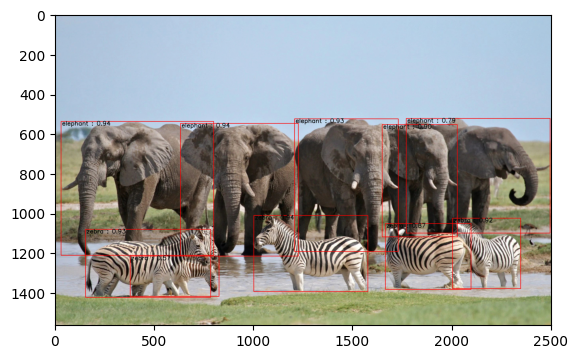

In [13]:
canvas = np.copy(img)

for p in predictions:
    x1, x2, y1, y2, label, label_confidence = p
    roi = img[y1:y2, x1:x2]

    color = (255, 0, 0)
    thickness = 2
    cv2.rectangle(canvas, (x1, y1), (x2, y2), color, thickness)

    text_position = (x1 + 5, y1 + 20)
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 1
    font_color = (0, 0, 0)
    font_thickness = 2

    cv2.putText(canvas, f"{label} : {label_confidence:.2f}", text_position, font, font_scale, font_color, font_thickness)

plt.imshow(canvas)